<h3 style="text-align: left; color: red;">Librerías importadas</h3>

A continuación, se describe el uso de cada librería en nuestro proyecto:
- pandas y numpy: Se usan para el manejo óptimo de los archivos "csv", ya que manejarlos en su mismo formato lo vuelve complejo de forma innecesaria.
- matplotlib y seaborn: Se usan para la obtencion de diagramas y gráficas de los datos.
- sklearn: Se usó esta librería contiene todos los métodos de imputación a usarse previo al modelado.
- os, shutil y glob: Se usaron estas librerías para el correcto manejo y organización de los archivos obtenidos.
- Parallel y delayed: Se usaron estas librerías para el procesamiento en paralelo de los archivos csv, ya que procesarlos de forma secuencial requiere una gran cantidad de recursos.

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from joblib import Parallel, delayed
import os
import shutil
import glob

<h3 style="text-align: left; color: red;">Lectura de csv's</h3>

Leemos los archivos que se encuentran en la carpeta desde donde se ejecuta el código y los movemos a la carpeta "Archivos No Imputados"

In [193]:
ruta_archivos_csv_origen = os.getcwd() # Obtenemos la ruta desde donde se ejecuta el Notebook
ruta_archivos_csv_destino = os.path.join(ruta_archivos_csv_origen, "Archivos No Imputados") # Definimos la ruta hacia donde van los archivos csv despues de leerse
os.makedirs("Archivos No Imputados", exist_ok = True) # Creamos la carpeta si no existe


def leer_mover_archivos (nombre_archivo_csv):
    ruta_origen_archivos_csv = os.path.join(ruta_archivos_csv_origen, nombre_archivo_csv) # Definimos la ruta actual del archivo csv
    ruta_carpeta_archivos_csv = os.path.join(ruta_archivos_csv_destino, nombre_archivo_csv) # Definimos la ruta donde deberia estar el archivo tras ejecutarse el codigo

    # Si el archivo se encuentra en la ruta de origen (desde donde se ejecuta el notebook)
    if os.path.exists(ruta_origen_archivos_csv): 

        archivo_pandas = pd.read_csv(ruta_origen_archivos_csv, low_memory = False) # Leemos el archivo csv
        archivo_pandas = archivo_pandas.reset_index(drop = True) 
        shutil.move(ruta_origen_archivos_csv, ruta_carpeta_archivos_csv) # Movemos el archivo csv desde la ruta de origen hacia la carpeta Archivos No Imputados
        print(f"{nombre_archivo_csv} leido y movido a la carpeta Archivos No Imputados")
        return archivo_pandas
    
    # Si el archivo se encuentra dentro de la carpeta "Archivos No Imputados"
    elif os.path.exists(ruta_carpeta_archivos_csv):

        archivo_pandas = pd.read_csv(ruta_carpeta_archivos_csv, low_memory = False) # Leemos el archivo csv
        archivo_pandas = archivo_pandas.reset_index(drop = True)
        print(f"{nombre_archivo_csv} ya se encuentra en Archivos No Imputados. Leyendo de nuevo")
        return archivo_pandas
    
    # Si el archivo no se encuentra en ninguna carpeta accesible por nuestro codigo
    else: 

        print(f"No se encontro el archivo {nombre_archivo_csv}")
        return None
       
ciudad_dia    = leer_mover_archivos("city_day.csv")
ciudad_hora   = leer_mover_archivos("city_hour.csv")
estacion_dia  = leer_mover_archivos("station_day.csv")
estacion_hora = leer_mover_archivos("station_hour.csv")
estaciones    = leer_mover_archivos("stations.csv")


# Creamos un diccionario con los nombres de los archivos csv y el nombre con el que se guardaran los archivos 
# lista = {
#     "ciudad_dia":"city_day.csv",
#     "ciudad_hora":"city_hour.csv",
#     "estacion_dia":"station_day.csv",
#     "estacion_hora":"station_hour.csv",
#     "estaciones":"stations.csv"
#     }

# class FicheroArchivos:
#     listaDataFrames = []
#     def __init__(self, listaCSV):
        
#         for x,y in listaCSV.items():
#             self.listaDataFrames.append(leer_mover_archivos(y)) 
# a = FicheroArchivos(lista)
# a.listaDataFrames[0]

city_day.csv ya se encuentra en Archivos No Imputados. Leyendo de nuevo
city_hour.csv ya se encuentra en Archivos No Imputados. Leyendo de nuevo
station_day.csv ya se encuentra en Archivos No Imputados. Leyendo de nuevo
station_hour.csv ya se encuentra en Archivos No Imputados. Leyendo de nuevo
stations.csv ya se encuentra en Archivos No Imputados. Leyendo de nuevo


Para la obtener más claridad acerca de las columnas y el tipo de datos, usamos describe() e info() para filtrar lo que necesitamos usar.

<h3 style="text-align: left; color: red;">Datos por Ciudad-día y filtrado</h3>

In [194]:
ciudad_dia.describe()
ciudad_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [195]:
# Descartamos las variables que no serán usadas, dejando las string para su posterior union
ciudad_dia_filtrado_string = ciudad_dia[['City', 'Date', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']]
ciudad_dia_filtrado_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    29531 non-null  object 
 1   Date    29531 non-null  object 
 2   PM2.5   24933 non-null  float64
 3   PM10    18391 non-null  float64
 4   NO2     25946 non-null  float64
 5   CO      27472 non-null  float64
 6   SO2     25677 non-null  float64
 7   O3      25509 non-null  float64
 8   AQI     24850 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.0+ MB


<h3 style="text-align: left; color: red;">Datos por Ciudad-hora y filtrado</h3>

In [196]:
ciudad_hora.describe()
ciudad_hora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [197]:
# Descartamos las variables que no serán usadas, dejando las string para su posterior union
ciudad_hora_filtrado_string = ciudad_hora[['City', 'Datetime', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']]
ciudad_hora_filtrado_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   City      707875 non-null  object 
 1   Datetime  707875 non-null  object 
 2   PM2.5     562787 non-null  float64
 3   PM10      411138 non-null  float64
 4   NO2       590753 non-null  float64
 5   CO        621358 non-null  float64
 6   SO2       577502 non-null  float64
 7   O3        578667 non-null  float64
 8   AQI       578795 non-null  float64
dtypes: float64(7), object(2)
memory usage: 48.6+ MB


<h3 style="text-align: left; color: red;">Datos por Estación-día y filtrado</h3>


In [198]:
estacion_dia.describe()
estacion_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [199]:
# Descartamos las variables que no serán usadas, dejando las string para su posterior union
estacion_dia_filtrado_string = estacion_dia[['Date', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']]
estacion_dia_filtrado_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    108035 non-null  object 
 1   PM2.5   86410 non-null   float64
 2   PM10    65329 non-null   float64
 3   NO2     91488 non-null   float64
 4   CO      95037 non-null   float64
 5   SO2     82831 non-null   float64
 6   O3      82467 non-null   float64
 7   AQI     87025 non-null   float64
dtypes: float64(7), object(1)
memory usage: 6.6+ MB


<h3 style="text-align: left; color: red;">Datos por Estación-hora y filtrado</h3>


In [200]:
estacion_hora.describe()
estacion_hora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


In [201]:
# Descartamos las variables que no serán usadas, dejando las string para su posterior union
estacion_hora_filtrado_string = estacion_hora[['Datetime', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']]
estacion_hora_filtrado_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Datetime  object 
 1   PM2.5     float64
 2   PM10      float64
 3   NO2       float64
 4   CO        float64
 5   SO2       float64
 6   O3        float64
 7   AQI       float64
dtypes: float64(7), object(1)
memory usage: 158.0+ MB


<h3 style="text-align: left; color: red;">Datos de Estaciones</h3>

Este archivo al solo contener un id y campos de tipo objeto/string, no será usado directamente para la imputación. Tiene una función importante en la unión de "tablas" por su campo "StationId"

In [202]:
estaciones.describe()
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


<h3 style="text-align: left; color: red;">Función para contar los valores NaN totales</h3>

In [203]:
# Definimos una funcion para verificar los valores NaN que tenemos en cada fila, si al menos existe 1 valor NaN en la fila, toda la fila se declara como tal
def contar_filas_con_nan_en_columnas_especificas(nombre_archivo_csv):
    archivo = pd.read_csv(nombre_archivo_csv)
    
    variables = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']
    archivo_filtrado = archivo[variables]
    
    filas_con_nan = archivo_filtrado.isna().any(axis = 1) # axis = 1 ya que revisamos por fila, operando a lo largo de las columnas
    cantidad_filas_con_nan = filas_con_nan.sum() # Sumamos las filas que contienen al menos un campo en NaN
    
    return cantidad_filas_con_nan

print("Valores NaN del csv ciudad-hora: ",contar_filas_con_nan_en_columnas_especificas("Archivos no imputados/city_hour.csv"))
print("Valores NaN del csv ciudad-dia: ",contar_filas_con_nan_en_columnas_especificas("Archivos no imputados/city_day.csv"))
print("Valores NaN del csv estacion-hora: ",contar_filas_con_nan_en_columnas_especificas("Archivos no imputados/station_hour.csv"))
print("Valores NaN del csv estacion-dia: ",contar_filas_con_nan_en_columnas_especificas("Archivos no imputados/station_day.csv"))

Valores NaN del csv ciudad-hora:  366370
Valores NaN del csv ciudad-dia:  13521


C:\Users\david\AppData\Local\Temp\ipykernel_13804\2595521705.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  archivo = pd.read_csv(nombre_archivo_csv)


Valores NaN del csv estacion-hora:  1554807
Valores NaN del csv estacion-dia:  58038


<h4 style="text-align: left; color: red;">Imputación mediante SimpleImputer, KNN y PCA en paralelo</h4>

A continuación, definimos las funciones que conforman la función principal para imputar nuestros valores vacíos mediante un barrido rápido con SimpleImputer y un posterior complemento con KNN y PCA. Esto en división por "chunks" o bloques para ejecutar los procesos en paralelo y optimizar los recursos limitados del dispositivo. 

<h5 style="text-align: left; color: red;">Función de barrido inicial con SimpleImputer</h5>

Para que el barrido sea rápido, se utilizo el parámetro "mean" de SimpleImputer, que toma la media de la columna para reemplazar los valores faltantes. Todo esto preservando las columnas e índices del archivo original.

In [204]:
def barrido_inicial(archivo_filtrado_pandas):
    
    simple_imputer = SimpleImputer(strategy = "mean") # Estrategia mean utilizada para optimizar
    archivo_pandas_barrido_inicial = pd.DataFrame(simple_imputer.fit_transform(archivo_filtrado_pandas),
                                     columns = archivo_filtrado_pandas.columns, # se guardan las columnas originales del archivo pandas para preservar el orden
                                     index   = archivo_filtrado_pandas.index) # se guardan los indices originales del archivo pandas para preservar el orden
    
    return archivo_pandas_barrido_inicial

<h5 style="text-align: left; color: red;">Función de complementación con PCA y KNN al barrido inicial</h5>

Esta función (parte de la función principal) procesa un único chunk del DataFrame que se tiene como argumento mediante KNN y PCA, todo esto guardando en un archivo parquet (binario columnar) para que el procesamiento sea más rápido.

In [205]:
def complemento_knn_PCA(chunk, iterador, carpeta_guardado, nombre_csv, n_pca = 5):
    # chunk : El fragmento del DataFrame completo que se ejecuta
    # iterador: En la función principal al utilizar un bucle for, este funciona como el contador del chunk actual
    # carpeta_guardado : Es la carpeta donde se guardan los archivos .parquet obtenidos
    # nombre_csv : Es el nombre base pasado como argumento para mejorar la comprensión del código y los archivos generados
    # n_pca : Es el numero de componentes (variables creadas por PCA a partir de las originales) para aplicar PCA

    print(f"Chunk {iterador}: Imputando con PCA + KNN...")

    scaler = StandardScaler() # Aqui aplicamos la normalizacion de datos (que todas las variables se encuentren en la misma escala)     
    original_index = chunk.index # Guardamos el indice original para preservar el orden al inicio de la division en chunks

    scaled = scaler.fit_transform(chunk) # Estandariza (calcula media y desviacion estandar y las aplica) para mantener una misma escala

    pca = PCA(n_components = n_pca) # Aplicamos PCA para reducir la dimensionalidad a 5 componentes principales
    reduced = pca.fit_transform(scaled) # Estandarizamos lo hecho por PCA

    knn = KNNImputer(n_neighbors = 3, weights='distance') # Aplicamos KNN en el chunk con los 3 registros mas similares, teniendo en cuenta que los vecinos mas cercanos tienen mas peso por "distance"
    reduced_imputed = knn.fit_transform(reduced) # Imputamos con KNN en el espacio reducido dado por PCA

    reconstructed = pca.inverse_transform(reduced_imputed) # Dado que reducimos la dimensionalidad a 5 anteriormente, reconvertimos los datos desde el espacio reducido

    # Revertimos la estandarización realizada con StandardScaler()
    final_chunk = pd.DataFrame(scaler.inverse_transform(reconstructed), # Los datos ya imputados con SimpleImputer, KNN y PCA
                               columns = chunk.columns, # verificamos los mismos nombres de columnas que el original
                               index   = original_index) # restauramos los indices originales del chunk, para no perder el orden

    nombre_archivo = os.path.splitext(os.path.basename(nombre_csv))[0] # Extraemos el nombre del archivo desde la ruta completa, separando el nombre del archivo de la extensión, usando [0] para tomar solo el nombre de la tupla ("nombre", ".extension")
    os.makedirs(carpeta_guardado, exist_ok = True) # Creamos la carpeta solo si no existe, si ya existe, no se crea nada
    os.makedirs("Parquets", exist_ok = True) # Creamos la carpeta Parquets con el mismo criterio anterior
    output_file = os.path.join(carpeta_guardado, f"{nombre_archivo}_chunk_{iterador}.parquet") # Definimos la ruta donde se van a guardar los archivos .parquet mediante el nombre antes extraído.
    final_chunk.to_parquet(output_file) # Guardamos el dataframe en formato parquet hacia la ruta definida
    print(f"Chunk {iterador} guardado en {output_file}.") 

    return output_file

<h5 style="text-align: left; color: red;">Función principal para la imputación de archivos</h5>


In [206]:
def imputacion_knn_pca_simpleImputer(archivo_pandas, nombre_csv): 

    # archivo_pandas: El DataFrame leido al inicio a partir del csv
    # nombre_csv: Es el nombre base pasado como argumento para mejorar la comprensión del código y los archivos generados

    indice_original = archivo_pandas.index # Almacenamos el índice completo del DataFrame para mantener el orden al final del proceso.

    n_chunks = 10  # Definimos la cantidad de chunks en las que será dividido el DataFrame
    chunks   = np.array_split(barrido_inicial(archivo_pandas), n_chunks) # Llamamos a barrido_inicial() para obtener los valores faltantes rellenados solo con la media por SimpleImputer(), dividiendo este en 10 trozos los mas iguales posible
    
    nombre_archivo   = os.path.splitext(os.path.basename(nombre_csv))[0] # Extraemos el nombre del archivo a partir de la ruta completa
    carpeta_guardado = os.path.join("Parquets", f"parquets_{nombre_archivo}") # Definimos la ruta donde se van a guardar los archivos .parquet
    os.makedirs(carpeta_guardado, exist_ok = True) # Creamos una carpeta dentro de Parquets solo si no existe, donde se van a guardar los chunks en orden

    numero_procesos = min(8, os.cpu_count()) # Definimos el máximo de procesos a realizarse, pueden ser tantos núcleos como tenga el dispositivo o 8 si tiene más.
    result = Parallel(n_jobs = numero_procesos)( # Con Parallel realizamos KNN y PCA en cada chunk, creando un entorno para ejecutarlos en paralelo
        delayed(complemento_knn_PCA)(chunk, iterador, carpeta_guardado, nombre_csv, n_pca = 5) for iterador, chunk in enumerate(chunks) # delayed (decorador) programa la ejecucion de nuestra función, ya que Parallel recibe una "lista" a realizarse, pasando esta "lista" mediante el bucle for.
    )

    print("Archivos resultantes: \n", result)
    lista_dataframes = [pd.read_parquet(f) for f in sorted(glob.glob(os.path.join(carpeta_guardado, f"{nombre_archivo}_chunk_*.parquet")))] # Generamos una ruta con el patrón definido para el archivo .parquet, donde mediante glob() y el bucle for con sorted ordenamos en orden los archivos buscados en la carpeta. Todo esto para leerlos y pasarlos a DataFrame, obteniendo una lista de n Dataframes. (n es el numero de chunks)
    
    dataframe_final = pd.concat(lista_dataframes).sort_index() #  Mediante concat() unimos los DataFrames de la lista obtenida anteriormente, ordenando las filas por su índice original para mantener el orden.
    
    rangos_variables = archivo_pandas.agg(['min', 'max']) # Aqui definimos los rangos maximos de cada variable, para evitar valores negativos o muy inusuales

    # Eliminamos mediante un bucle para corregir los outliers negativos o excesivamente fuera de lo normal que aparecen por la aplicacion seguida de PCA y KNN en baja dimension
    for columna in rangos_variables.columns:
        min_real = rangos_variables.loc['min', columna]
        max_real = rangos_variables.loc['max', columna]
        dataframe_final[columna] = dataframe_final[columna].clip(lower = min_real, upper = max_real)
        
    print("Imputacion terminada")

    # Verificador para ver si todavía existe algun valor NaN
    if dataframe_final.isnull().values.any() :
        print("Quedan valores vacios en el archivo.")
    else:
        print("No quedan valores vacios en el archivo")

    # Verificador para ver si se mantuvieron los indices comparando con su original
    if not (dataframe_final.index == indice_original).all():
        print("Los índices se desordenaron")
    else:
        print("Indices iguales.")
    
    archivo_csv = f"{nombre_archivo}_imputado" # Definimos el nombre del archivo csv a guardar
    os.makedirs("Archivos Imputados", exist_ok = True) # Creamos la carpeta donde se guardaran los archivos imputados, solo si existe
    carpeta_guardar_imputados = os.path.join("Archivos Imputados", f"{archivo_csv}.csv") # Definimos la ruta donde se guardaran, que es dentro de la carpeta antes creada
    
    dataframe_final.to_csv(carpeta_guardar_imputados, index=True) # Transformamos el archivo pandas a csv, donde este se guardara en la carpeta antes definida

    return None

<h4 style="text-align: left; color: red;"><i>Imputación Ciudad-Hora</i></h4>

In [207]:
ciudad_hora_filtrado_2 = ciudad_hora[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']]
imputacion_knn_pca_simpleImputer(ciudad_hora_filtrado_2, "city_hour")

c:\Users\david\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Archivos resultantes: 
 ['Parquets\\parquets_city_hour\\city_hour_chunk_0.parquet', 'Parquets\\parquets_city_hour\\city_hour_chunk_1.parquet', 'Parquets\\parquets_city_hour\\city_hour_chunk_2.parquet', 'Parquets\\parquets_city_hour\\city_hour_chunk_3.parquet', 'Parquets\\parquets_city_hour\\city_hour_chunk_4.parquet', 'Parquets\\parquets_city_hour\\city_hour_chunk_5.parquet', 'Parquets\\parquets_city_hour\\city_hour_chunk_6.parquet', 'Parquets\\parquets_city_hour\\city_hour_chunk_7.parquet', 'Parquets\\parquets_city_hour\\city_hour_chunk_8.parquet', 'Parquets\\parquets_city_hour\\city_hour_chunk_9.parquet']
Imputacion terminada
No quedan valores vacios en el archivo
Indices iguales.


<h4 style="text-align: left; color: red;"><i>Imputación Ciudad-Día</i></h4>

In [208]:
ciudad_dia_filtrado_2 = ciudad_dia[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']]
imputacion_knn_pca_simpleImputer(ciudad_dia_filtrado_2, "city_day")

c:\Users\david\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Archivos resultantes: 
 ['Parquets\\parquets_city_day\\city_day_chunk_0.parquet', 'Parquets\\parquets_city_day\\city_day_chunk_1.parquet', 'Parquets\\parquets_city_day\\city_day_chunk_2.parquet', 'Parquets\\parquets_city_day\\city_day_chunk_3.parquet', 'Parquets\\parquets_city_day\\city_day_chunk_4.parquet', 'Parquets\\parquets_city_day\\city_day_chunk_5.parquet', 'Parquets\\parquets_city_day\\city_day_chunk_6.parquet', 'Parquets\\parquets_city_day\\city_day_chunk_7.parquet', 'Parquets\\parquets_city_day\\city_day_chunk_8.parquet', 'Parquets\\parquets_city_day\\city_day_chunk_9.parquet']
Imputacion terminada
No quedan valores vacios en el archivo
Indices iguales.


<h4 style="text-align: left; color: red;"><i>Imputación Estación-Hora</i></h4>


In [209]:
estacion_hora_union = pd.merge(estacion_hora, estaciones, on = "StationId", how = "inner")
estacion_hora_filtrado = estacion_hora_union[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']]
estacion_hora_filtrado.info()
imputacion_knn_pca_simpleImputer(estacion_hora_filtrado, "station_hour")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PM2.5   float64
 1   PM10    float64
 2   NO2     float64
 3   CO      float64
 4   SO2     float64
 5   O3      float64
 6   AQI     float64
dtypes: float64(7)
memory usage: 138.3 MB


c:\Users\david\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Archivos resultantes: 
 ['Parquets\\parquets_station_hour\\station_hour_chunk_0.parquet', 'Parquets\\parquets_station_hour\\station_hour_chunk_1.parquet', 'Parquets\\parquets_station_hour\\station_hour_chunk_2.parquet', 'Parquets\\parquets_station_hour\\station_hour_chunk_3.parquet', 'Parquets\\parquets_station_hour\\station_hour_chunk_4.parquet', 'Parquets\\parquets_station_hour\\station_hour_chunk_5.parquet', 'Parquets\\parquets_station_hour\\station_hour_chunk_6.parquet', 'Parquets\\parquets_station_hour\\station_hour_chunk_7.parquet', 'Parquets\\parquets_station_hour\\station_hour_chunk_8.parquet', 'Parquets\\parquets_station_hour\\station_hour_chunk_9.parquet']
Imputacion terminada
No quedan valores vacios en el archivo
Indices iguales.


<h4 style="text-align: left; color: red;"><i>Imputación Estación-Día</i></h4>


In [210]:
estacion_dia_union = pd.merge(estacion_dia, estaciones, on = "StationId", how = "inner")
estacion_dia_filtrado = estacion_dia_union[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']]
estacion_dia_filtrado.info()
imputacion_knn_pca_simpleImputer(estacion_dia_filtrado, "station_day")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   86410 non-null  float64
 1   PM10    65329 non-null  float64
 2   NO2     91488 non-null  float64
 3   CO      95037 non-null  float64
 4   SO2     82831 non-null  float64
 5   O3      82467 non-null  float64
 6   AQI     87025 non-null  float64
dtypes: float64(7)
memory usage: 5.8 MB
Archivos resultantes: 
 ['Parquets\\parquets_station_day\\station_day_chunk_0.parquet', 'Parquets\\parquets_station_day\\station_day_chunk_1.parquet', 'Parquets\\parquets_station_day\\station_day_chunk_2.parquet', 'Parquets\\parquets_station_day\\station_day_chunk_3.parquet', 'Parquets\\parquets_station_day\\station_day_chunk_4.parquet', 'Parquets\\parquets_station_day\\station_day_chunk_5.parquet', 'Parquets\\parquets_station_day\\station_day_chunk_6.parquet', 'Parquets\\parquets_station_day\\station_day_chunk_

c:\Users\david\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Imputacion terminada
No quedan valores vacios en el archivo
Indices iguales.


<h4 style="text-align: left; color: red;">Unión de archivos imputados (columnas de texto)</h4>

Aquí, unimos las columnas extraidas anteriormente cuando se realizó la imputación solo con los valores numéricos, para el caso de las estaciones es necesario comparar con el archivo "union" antes hecho, ya que la columna "city" no se encuentra en "stations.csv"

<h5 style="text-align: left; color: red;"><i>Unión/Comprobación Ciudad-Día</i></h5>

In [211]:
ciudad_dia_imputado = pd.read_csv("Archivos Imputados/city_day_imputado.csv", index_col = 0) # Leemos nuevamente el csv de los datos imputados

columnas_string = ciudad_dia_filtrado_string[['City', 'Date']]

# Verificamos que las filas tengan el mismo numero, es decir, no se hayan perdido datos
if len(columnas_string) != len(ciudad_dia_imputado):
    print("Las filas no coinciden")
else:
    print("Las filas coinciden")
    
    ciudad_dia_imputado_completo = pd.concat([columnas_string, ciudad_dia_imputado], axis = 1) # Unimos nuestro csv de datos imputados con las columnas especificadas, usando axis = 1 ya que estamos uniendo columnas y no filas.

    ciudad_dia_imputado_completo.info()

Las filas coinciden
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    29531 non-null  object 
 1   Date    29531 non-null  object 
 2   PM2.5   29531 non-null  float64
 3   PM10    29531 non-null  float64
 4   NO2     29531 non-null  float64
 5   CO      29531 non-null  float64
 6   SO2     29531 non-null  float64
 7   O3      29531 non-null  float64
 8   AQI     29531 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.0+ MB


<h5 style="text-align: left; color: red;"><i>Unión/Comprobación Ciudad-Hora</i></h5>

In [212]:

ciudad_hora_imputado = pd.read_csv("Archivos Imputados/city_hour_imputado.csv", index_col = 0) # Leemos nuevamente el csv de los datos imputados

columnas_string = ciudad_hora_filtrado_string[['City', 'Datetime']]

# Verificamos que las filas tengan el mismo numero, es decir, no se hayan perdido datos
if len(columnas_string) != len(ciudad_hora_imputado):
    print("Las filas no coinciden")
else:
    print("Las filas coinciden")
    
    ciudad_hora_imputado_completo = pd.concat([columnas_string, ciudad_hora_imputado], axis = 1)# Unimos nuestro csv de datos imputados con las columnas especificadas, usando axis = 1 ya que estamos uniendo columnas y no filas

    ciudad_hora_imputado_completo.info()

Las filas coinciden
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   City      707875 non-null  object 
 1   Datetime  707875 non-null  object 
 2   PM2.5     707875 non-null  float64
 3   PM10      707875 non-null  float64
 4   NO2       707875 non-null  float64
 5   CO        707875 non-null  float64
 6   SO2       707875 non-null  float64
 7   O3        707875 non-null  float64
 8   AQI       707875 non-null  float64
dtypes: float64(7), object(2)
memory usage: 48.6+ MB


<h5 style="text-align: left; color: red;"><i>Unión/Comprobación Estación-Día</i></h5>


In [213]:
estacion_dia_imputado = pd.read_csv("Archivos Imputados/station_day_imputado.csv", index_col = 0) # Leemos nuevamente el csv de los datos imputados

# Usamos el archivo pandas directamente sin filtrar ya que una columna no se encuentra en el archivo station_day
columnas_string = estacion_dia_union[['City', 'Date']]

# Verificamos que las filas tengan el mismo numero, es decir, no se hayan perdido datos
if len(columnas_string) != len(estacion_dia_imputado):
    print("Las filas no coinciden")
else:
    print("Las filas coinciden")
    estacion_dia_imputado_completo = pd.concat([columnas_string, estacion_dia_imputado], axis = 1) # Unimos nuestro csv de datos imputados con las columnas especificadas, usando axis = 1 ya que estamos uniendo columnas y no filas

    estacion_dia_imputado_completo.info()

Las filas coinciden
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   City    108035 non-null  object 
 1   Date    108035 non-null  object 
 2   PM2.5   108035 non-null  float64
 3   PM10    108035 non-null  float64
 4   NO2     108035 non-null  float64
 5   CO      108035 non-null  float64
 6   SO2     108035 non-null  float64
 7   O3      108035 non-null  float64
 8   AQI     108035 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.4+ MB


<h5 style="text-align: left; color: red;"><i>Unión/Comprobación Estación-Hora</i></h5>


In [214]:
estacion_hora_imputado = pd.read_csv("Archivos Imputados/station_hour_imputado.csv", index_col = 0) # Leemos nuevamente el csv de los datos imputados

# Usamos el archivo pandas directamente sin filtrar ya que una columna no se encuentra en el archivo station_day
columnas_string = estacion_hora_union[['City', 'Datetime']]

# Verificamos que las filas tengan el mismo numero, es decir, no se hayan perdido datos
if len(columnas_string) != len(estacion_hora_imputado):
    print("Las filas no coinciden")
else:
    print("Las filas coinciden")
    
    estacion_hora_imputado_completo = pd.concat([columnas_string, estacion_hora_imputado], axis = 1) # Unimos nuestro csv de datos imputados con las columnas especificadas, usando axis = 1 ya que estamos uniendo columnas y no filas
    
    estacion_hora_imputado_completo.info()

Las filas coinciden
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   City      object 
 1   Datetime  object 
 2   PM2.5     float64
 3   PM10      float64
 4   NO2       float64
 5   CO        float64
 6   SO2       float64
 7   O3        float64
 8   AQI       float64
dtypes: float64(7), object(2)
memory usage: 177.8+ MB


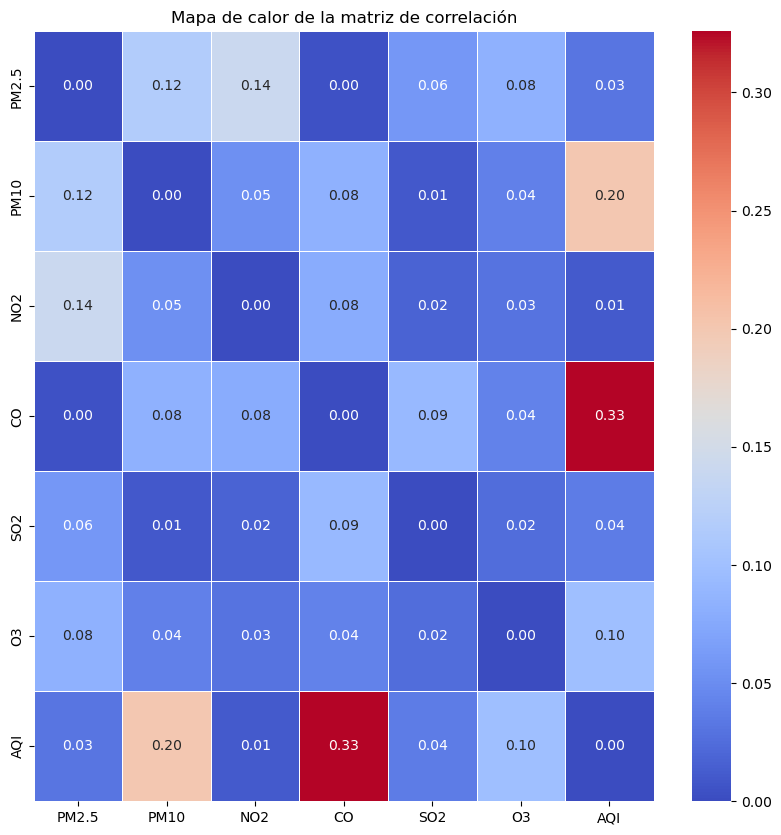

In [215]:
corr_original = ciudad_hora_filtrado_2.dropna().corr()
corr_imputada = ciudad_hora_imputado.corr()

diff = (corr_original - corr_imputada).abs()

plt.figure(figsize=(10, 10))  # Definimos el tamaño de la grafica
sns.heatmap(diff, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Mapa de calor de la matriz de correlación")
plt.show()  

In [216]:
print("Valores únicos imputados PM2.5:", ciudad_hora_imputado['PM2.5'][ciudad_hora_filtrado_2['PM2.5'].isnull()].nunique())
print("Valores únicos imputados AQI:", ciudad_hora_imputado['AQI'][ciudad_hora_filtrado_2['AQI'].isnull()].nunique())

Valores únicos imputados PM2.5: 47545
Valores únicos imputados AQI: 37267


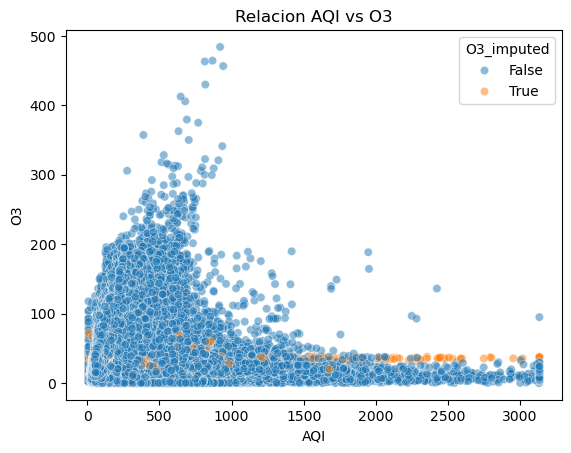

In [217]:
ciudad_hora_imputado['AQI_imputed'] = ciudad_hora['AQI'].isnull()
ciudad_hora_imputado['O3_imputed'] = ciudad_hora['O3'].isnull()

sns.scatterplot(data=ciudad_hora_imputado, x='AQI', y='O3', hue='O3_imputed', alpha=0.5)
plt.title("Relacion AQI vs O3")
plt.show()

c:\Users\david\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


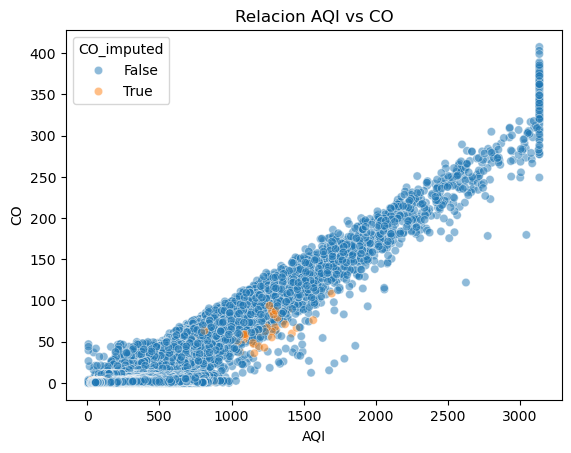

In [219]:
ciudad_hora_imputado['AQI_imputed'] = ciudad_hora['AQI'].isnull()
ciudad_hora_imputado['CO_imputed'] = ciudad_hora['CO'].isnull()

sns.scatterplot(data=ciudad_hora_imputado, x='AQI', y='CO', hue='CO_imputed', alpha=0.5)
plt.title("Relacion AQI vs CO")
plt.show()

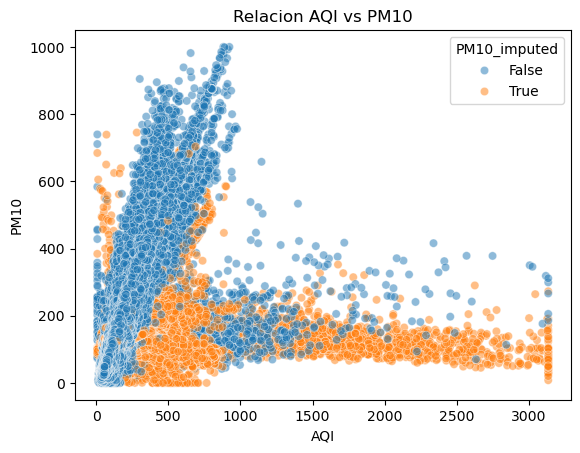

In [222]:
ciudad_hora_imputado['AQI_imputed'] = ciudad_hora['AQI'].isnull()
ciudad_hora_imputado['PM10_imputed'] = ciudad_hora['PM10'].isnull()

sns.scatterplot(data=ciudad_hora_imputado, x='AQI', y='PM10', hue='PM10_imputed', alpha=0.5)
plt.title("Relacion AQI vs PM10")
plt.show()

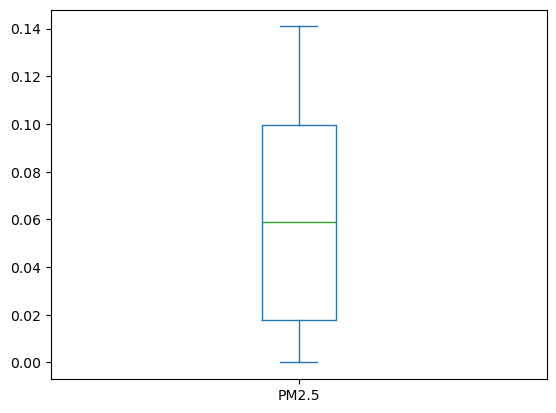

In [220]:
corr_original = ciudad_hora_filtrado_2.dropna().corr()
corr_imputada = ciudad_hora_imputado.corr()

diff = (corr_original - corr_imputada).abs()

diff['PM2.5'].plot.box()
plt.show()

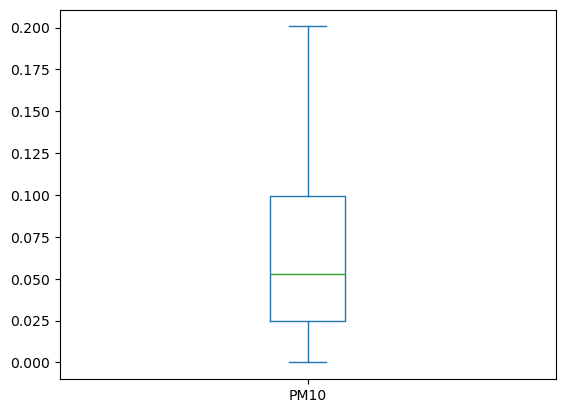

In [221]:
diff['PM10'].plot.box()
plt.show()

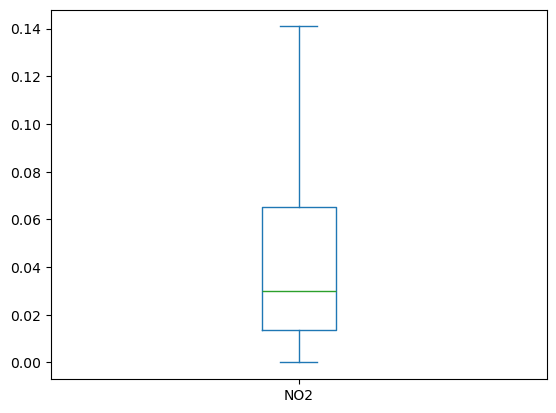

In [223]:
diff['NO2'].plot.box()
plt.show()

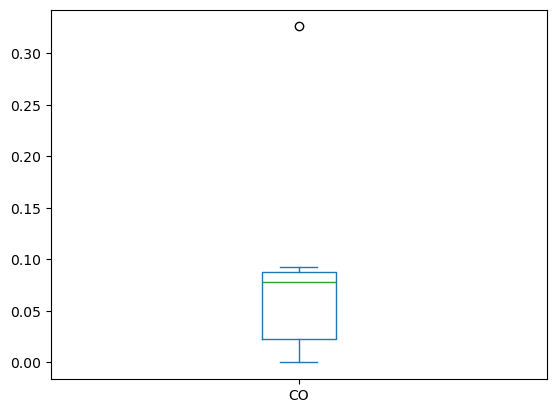

In [224]:
diff['CO'].plot.box()
plt.show()

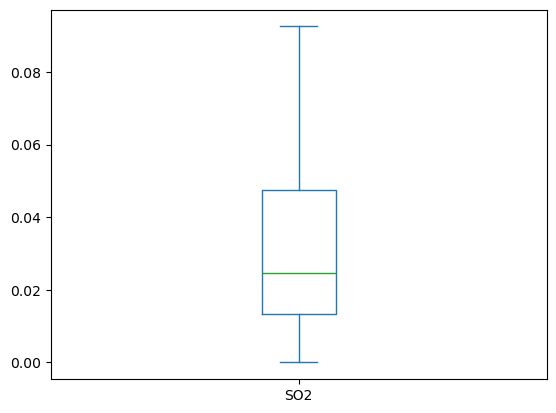

In [225]:
diff['SO2'].plot.box()
plt.show()

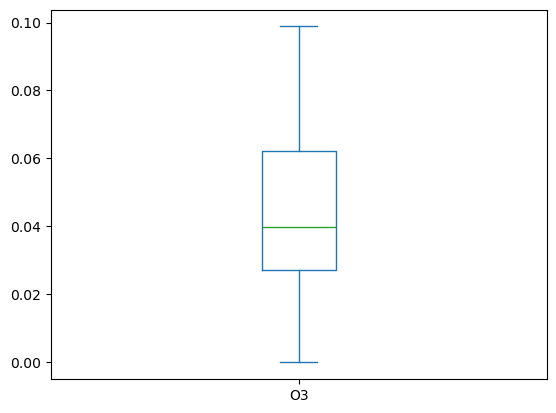

In [226]:
diff['O3'].plot.box()
plt.show()

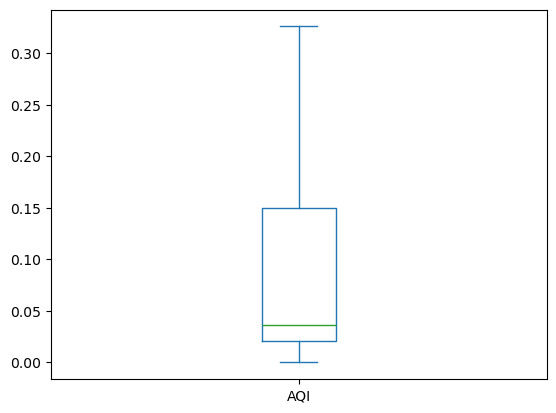

In [227]:
diff['AQI'].plot.box()
plt.show()